### EU Cities Temperatures Dataset (55 points)

In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
eu_file = 'EuCitiesTemperatures.csv'
eu = pd.read_csv(eu_file)

In [3]:
eu

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
1,Andorra,Andorra,0.07,no,no,42.50,1.52,NaN
2,Innsbruck,Austria,8.57,yes,no,NaN,11.41,4.54
3,Graz,Austria,8.57,yes,no,47.08,NaN,6.91
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.79
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,NaN,NaN
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.14
210,Inverness,United Kingdom,65.11,yes,yes,NaN,-4.23,8.00
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.60


In [4]:
eu_na = eu.isna().sum()
print(eu_na)

city            0
country         0
population      0
EU              0
coastline       0
latitude       62
longitude      62
temperature    64
dtype: int64


In [5]:
eu['latitude'] = eu['latitude'].fillna(eu['latitude'].mean().round(2))
eu['longitude'] = eu['longitude'].fillna(eu['longitude'].mean().round(2))

In [6]:
subset_cities = eu[(eu['latitude'] >= 40) & (eu['latitude'] <= 60) & 
                   (eu['longitude'] >= 15) & (eu['longitude'] <= 30)]

subset_cities

,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.18
3,Graz,Austria,8.57,yes,no,47.08,15.67,6.91
5,Salzburg,Austria,8.57,yes,no,47.81,15.67,4.62
6,Vienna,Austria,8.57,yes,no,48.20,16.37,7.86
7,Minsk,Belarus,9.48,no,no,47.36,27.57,5.28
...,...,...,...,...,...,...,...,...
196,Zhytomyr,Ukraine,44.62,no,yes,47.36,15.67,6.67
199,Yevpatoriya,Ukraine,44.62,no,yes,45.20,15.67,NaN
201,Blackpool,United Kingdom,65.11,yes,yes,53.83,15.67,NaN
207,Dundee,United Kingdom,65.11,yes,yes,56.47,15.67,NaN


In [7]:
country_city_counts = subset_cities['country'].value_counts()
country_city_counts

country
Romania           9
Poland            9
Ukraine           7
Turkey            7
France            7
Belarus           6
Spain             6
Bulgaria          5
Hungary           4
Italy             4
Lithuania         3
Austria           3
Sweden            3
Serbia            3
United Kingdom    3
Moldova           2
Latvia            2
Slovakia          2
Estonia           2
Czech Republic    2
Macedonia         1
Montenegro        1
Norway            1
Ireland           1
Germany           1
Denmark           1
Croatia           1
Albania           1
Name: count, dtype: int64

In [8]:
max_cities = country_city_counts.max()
countries_with_max_cities = country_city_counts[country_city_counts == max_cities].index.tolist()

print(f"Countries with the maximum number of cities ({max_cities}): {countries_with_max_cities}")

Countries with the maximum number of cities (9): ['Romania', 'Poland']


In [9]:
def fill_temperature(row):
    if pd.isna(row['temperature']):
        region_type = (row['EU'], row['coastline'])
        avg_temp = eu[(eu['EU'] == region_type[0]) & 
                      (eu['coastline'] == region_type[1])]['temperature'].mean()
        return avg_temp
    return row['temperature']

eu['temperature'] = eu.apply(fill_temperature, axis=1)

In [10]:
eu_na = eu.isna().sum()
print(eu_na)
eu #every value in the table is 0

city           0
country        0
population     0
EU             0
coastline      0
latitude       0
longitude      0
temperature    0
dtype: int64


,city,country,population,EU,coastline,latitude,longitude,temperature
0,Elbasan,Albania,2.90,no,yes,41.12,20.08,15.180000
1,Andorra,Andorra,0.07,no,no,42.50,1.52,7.481538
2,Innsbruck,Austria,8.57,yes,no,47.36,11.41,4.540000
3,Graz,Austria,8.57,yes,no,47.08,15.67,6.910000
4,Linz,Austria,8.57,yes,no,48.32,14.29,6.790000
...,...,...,...,...,...,...,...,...
208,Edinburgh,United Kingdom,65.11,yes,yes,55.95,15.67,10.314494
209,Exeter,United Kingdom,65.11,yes,yes,50.70,-3.53,10.140000
210,Inverness,United Kingdom,65.11,yes,yes,47.36,-4.23,8.000000
211,Glasgow,United Kingdom,65.11,yes,yes,55.87,-4.25,8.600000


In [11]:
import matplotlib.pyplot as plt

In [12]:
region_counts = eu.groupby(['EU', 'coastline']).size()
region_counts = region_counts.reset_index(name='city_count')
region_counts['region_type'] = region_counts['EU'] + ', ' + region_counts['coastline']

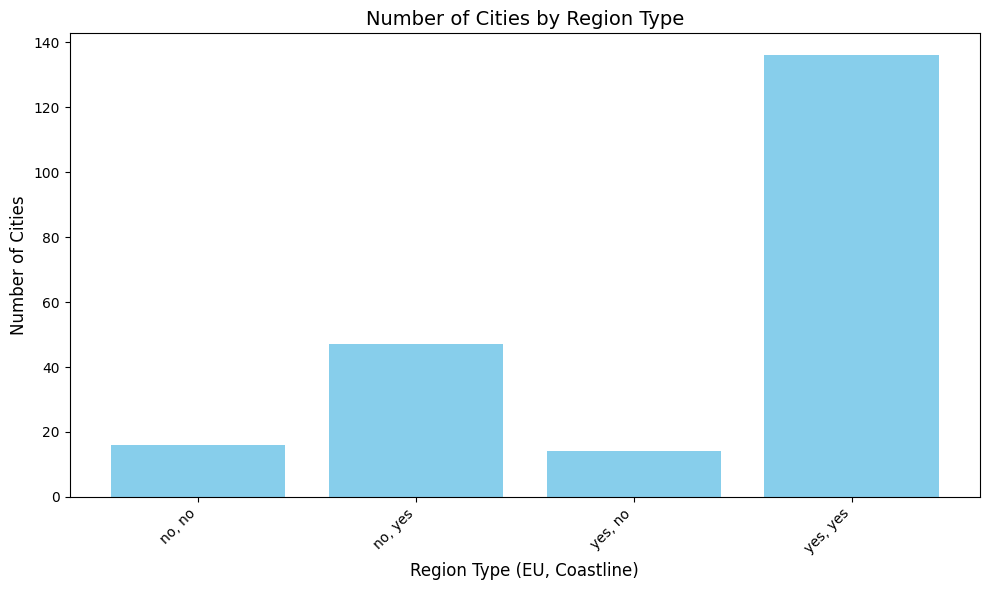

In [13]:
plt.figure(figsize=(10, 6))
plt.bar(region_counts['region_type'], region_counts['city_count'], color='skyblue')
plt.xlabel('Region Type (EU, Coastline)', fontsize=12)
plt.ylabel('Number of Cities', fontsize=12)
plt.title('Number of Cities by Region Type', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 8))
countries = eu['country'].unique()
for country in countries:
    country_data = eu[eu['country'] == country]
    plt.scatter(country_data['longitude'], country_data['latitude'], label=country, s=50)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.title('Scatter Plot of Cities by Latitude and Longitude', fontsize=14)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1), title='Country', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

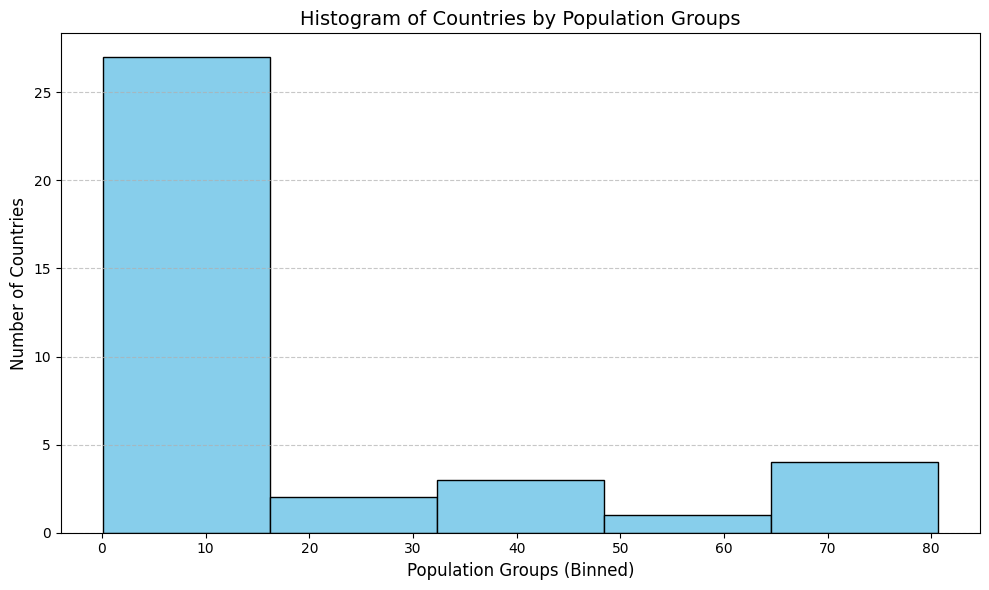

In [15]:
unique_countries = eu[['country', 'population']].drop_duplicates()
plt.figure(figsize=(10, 6))
plt.hist(unique_countries['population'], bins=5, color='skyblue', edgecolor='black')
plt.xlabel('Population Groups (Binned)', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.title('Histogram of Countries by Population Groups', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
def get_color(temp):
    if temp > 10:
        return 'red'
    elif temp < 6:
        return 'blue'
    else:
        return 'orange'

In [ ]:
region_groups = eu.groupby(['EU', 'coastline'])

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, ((eu_status, coastline_status), group) in enumerate(region_groups):
    x_ticks = range(len(group))  # Represent each city as a number from 0 to n-1
    colors = group['temperature'].apply(get_color).tolist()  # Dynamically determine colors
    
    axes[i].scatter(x_ticks, group['latitude'], c=colors, s=50)
    axes[i].set_title(f"EU: {eu_status}, Coastline: {coastline_status}", fontsize=12)
    axes[i].set_xlabel("City Index", fontsize=10)
    axes[i].set_ylabel("Latitude", fontsize=10)
    axes[i].set_xticks(x_ticks)
    axes[i].grid(True)

plt.tight_layout()
plt.show()